Theoretical


Q1. What is K-Nearest Neighbors (KNN) and how does it work?

KNN is a non-parametric, instance-based learning algorithm that classifies or predicts data points based on the majority vote or average of 
the k closest training examples in the feature space.

Q2. What is the difference between KNN Classification and KNN Regression?

Classification: Predicts the most common class among the k nearest neighbors.
Regression: Predicts the average (or weighted average) of the values of the k nearest neighbors.

Q3. What is the role of the distance metric in KNN?

The distance metric (e.g., Euclidean, Manhattan) determines how "closeness" is calculated between data points, which directly affects neighbor 
selection and model performance.

Q4. What is the Curse of Dimensionality in KNN?

As dimensions increase, data becomes sparse, distances between points become less meaningful, and KNN’s accuracy often drops due to ineffective
neighbor comparisons.

Q5. How can we choose the best value of K in KNN?

Use cross-validation to test different k values and choose the one that gives the best performance (e.g., lowest error or highest accuracy).

Q6. What are KD Tree and Ball Tree in KNN?

They are spatial data structures used to speed up nearest neighbor searches:
KD Tree: Efficient for low-dimensional data.
Ball Tree: Works better for high-dimensional data.

Q7. When should you use KD Tree vs. Ball Tree?

Use KD Tree when the number of dimensions is < 20.
Use Ball Tree when dealing with high-dimensional or non-axis-aligned data.

Q8. What are the disadvantages of KNN?

High computational cost on large datasets.
Sensitive to irrelevant features and feature scaling.
Performs poorly in high dimensions.

Q9. How does feature scaling affect KNN?

KNN relies on distance calculations, so features must be scaled (e.g., Min-Max or StandardScaler) to avoid dominance by features with larger ranges.

Q10. What is PCA (Principal Component Analysis)?

PCA is a dimensionality reduction technique that transforms features into a smaller number of uncorrelated components while preserving the most
variance.

Q11. How does PCA work?

PCA computes the covariance matrix, finds its eigenvalues and eigenvectors, and projects data onto the top eigenvectors (principal components) 
that explain most of the variance.

Q12. What is the geometric intuition behind PCA?

PCA rotates the coordinate axes to align with directions of maximum variance, projecting the data onto fewer dimensions while maintaining structure.

Q13. What is the difference between Feature Selection and Feature Extraction?

Feature Selection: Chooses a subset of existing features.
Feature Extraction: Creates new features from existing ones (e.g., PCA transforms features into components)

Q14. What are Eigenvalues and Eigenvectors in PCA?

Eigenvectors define the direction of the new feature axes.
Eigenvalues indicate the variance captured by each eigenvector.

Q15. How do you decide the number of components to keep in PCA?

Use the explained variance ratio (e.g., keep enough components to explain 95% of the variance) or a scree plot to find the "elbow" point.

Q16. Can PCA be used for classification?
                    
Yes, PCA can be used as a preprocessing step to reduce dimensionality before classification with models like KNN or SVM.

Q17. What are the limitations of PCA?

Assumes linear relationships.

May discard informative features.

Harder to interpret transformed features.

Sensitive to outliers and feature scaling.

Q18. How do KNN and PCA complement each other?

PCA reduces dimensionality and noise, helping KNN work better by mitigating the curse of dimensionality and improving computational efficiency.

Q19. How does KNN handle missing values in a dataset?

KNN doesn't inherently handle missing values—data should be imputed (e.g., using mean, median, or KNN imputation) before applying KNN.

In [ ]:
Q20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?

Aspect | PCA | LDA
Goal | Maximize variance | Maximize class separability
Supervised | No | Yes
Components | Uncorrelated features | Linear combinations that best separate classes
Use case | Compression, noise reduction | Classification

In [1]:
#Q21.Train a KNN Classifier on the Iris dataset and print model accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [2]:
#Q22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)

from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=2, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 123.96208262496155


In [7]:
#Q23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load and prepare data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try different distance metrics
for metric in ['euclidean', 'manhattan']:
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    print(f"{metric.capitalize()} Accuracy: {accuracy_score(y_test, y_pred):.4f}")



Euclidean Accuracy: 1.0000
Manhattan Accuracy: 1.0000


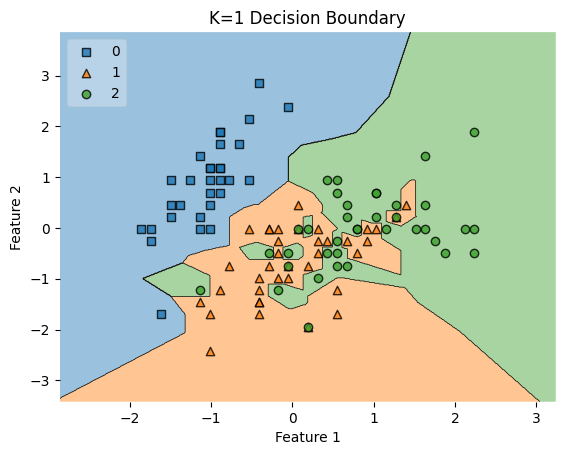

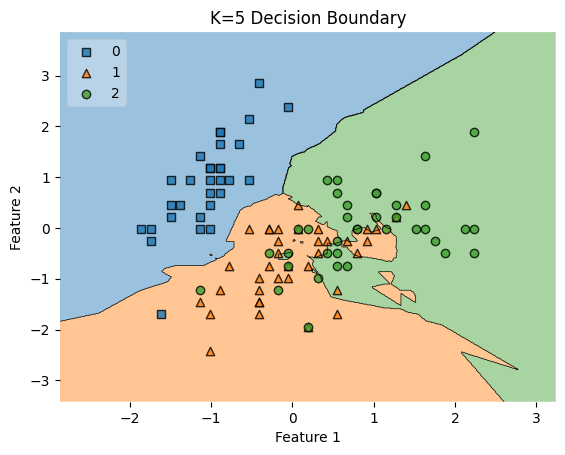

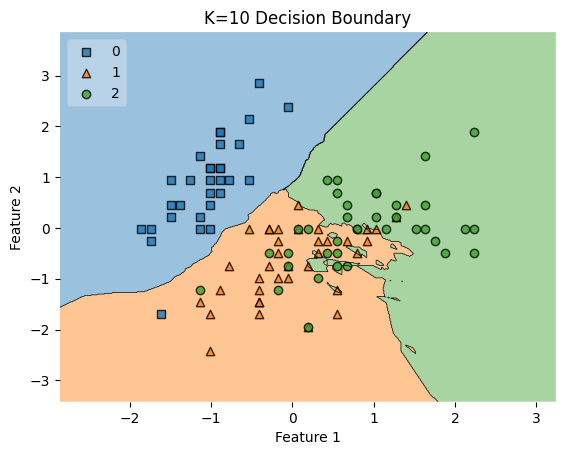

In [8]:
#Q24. Train a KNN Classifier with different values of K and visualize decision boundaries

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

# Load dataset and reduce to 2 features for plotting
iris = load_iris()
X = iris.data[:, :2]  # Only use first 2 features
y = iris.target

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train with different K values and plot decision boundaries
for k in [1, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    plt.figure()
    plot_decision_regions(X_train_scaled, y_train, clf=knn, legend=2)
    plt.title(f"K={k} Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
plt.show()


In [9]:
#Q25. Apply Feature Scaling before training a KNN model and compare results with unscaled data

from sklearn.preprocessing import StandardScaler

# Without Scaling
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Unscaled Accuracy:", accuracy_score(y_test, knn.predict(X_test)))

# With Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled, y_train)
print("Scaled Accuracy:", accuracy_score(y_test, knn.predict(X_test_scaled)))


Unscaled Accuracy: 0.7555555555555555
Scaled Accuracy: 0.8444444444444444


In [10]:
#Q26. Train a PCA model on synthetic data and print the explained variance ratio for each component

from sklearn.decomposition import PCA

X, _ = make_regression(n_samples=100, n_features=5, noise=0.2)
pca = PCA()
pca.fit(X)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.29415526 0.2224754  0.19998144 0.15709196 0.12629594]


In [11]:
#Q27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

# Without PCA
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
acc1 = accuracy_score(y_test, knn.predict(X_test_scaled))

# With PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
knn.fit(X_train_pca, y_train)
acc2 = accuracy_score(y_test, knn.predict(X_test_pca))

print(f"Accuracy without PCA: {acc1}")
print(f"Accuracy with PCA: {acc2}")


Accuracy without PCA: 0.8444444444444444
Accuracy with PCA: 0.8


In [12]:
#Q28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 21)), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 17}
Best Accuracy: 0.8095238095238096


In [13]:
#Q29. Train a KNN Classifier and check the number of misclassified samples

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
misclassified = (y_test != y_pred).sum()
print("Misclassified samples:", misclassified)


Misclassified samples: 7


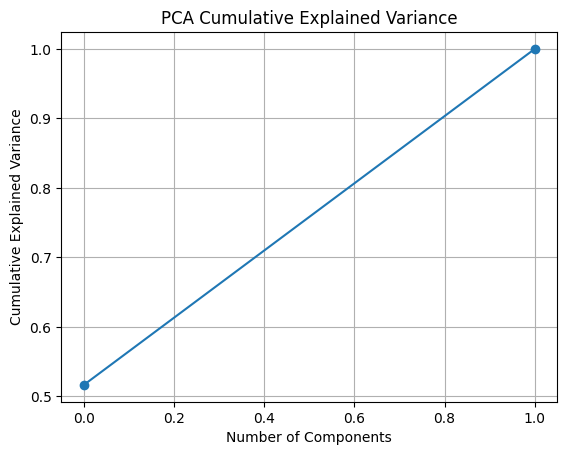

In [14]:
#Q30. Train a PCA model and visualize the cumulative explained variance

import numpy as np

pca = PCA()
pca.fit(X_train_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cum_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid()
plt.show()


In [15]:
# Q31: Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN with uniform weights
knn_uniform = KNeighborsClassifier(weights='uniform')
knn_uniform.fit(X_train, y_train)
y_pred_uniform = knn_uniform.predict(X_test)
accuracy_uniform = accuracy_score(y_test, y_pred_uniform)

# KNN with distance weights
knn_distance = KNeighborsClassifier(weights='distance')
knn_distance.fit(X_train, y_train)
y_pred_distance = knn_distance.predict(X_test)
accuracy_distance = accuracy_score(y_test, y_pred_distance)

# Output accuracies
print(f'Accuracy with uniform weights: {accuracy_uniform}')
print(f'Accuracy with distance weights: {accuracy_distance}')


Accuracy with uniform weights: 1.0
Accuracy with distance weights: 1.0


In [16]:
# Q32: Train a KNN Regressor and analyze the effect of different K values on performance

from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Analyze different K values
k_values = [1, 3, 5, 7, 9]
errors = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

# Output MSE for each K value
for k, error in zip(k_values, errors):
    print(f'Mean Squared Error for K={k}: {error}')


Mean Squared Error for K=1: 6453.348202757138
Mean Squared Error for K=3: 4936.654099195847
Mean Squared Error for K=5: 4609.2104607298825
Mean Squared Error for K=7: 4657.567436708187
Mean Squared Error for K=9: 5125.325457180483


In [17]:
# Q33: Implement KNN Imputation for handling missing values in a dataset

from sklearn.impute import KNNImputer
import numpy as np

# Create data with missing values
data_with_missing = np.array([[1, 2, np.nan], [4, np.nan, 6], [7, 8, 9], [10, 11, 12]])
print("Original data with missing values:")
print(data_with_missing)

# KNN Imputer
imputer = KNNImputer(n_neighbors=2)
data_imputed = imputer.fit_transform(data_with_missing)

# Output imputed data
print("\nData after KNN imputation:")
print(data_imputed)


Original data with missing values:
[[ 1.  2. nan]
 [ 4. nan  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]

Data after KNN imputation:
[[ 1.   2.   7.5]
 [ 4.   5.   6. ]
 [ 7.   8.   9. ]
 [10.  11.  12. ]]


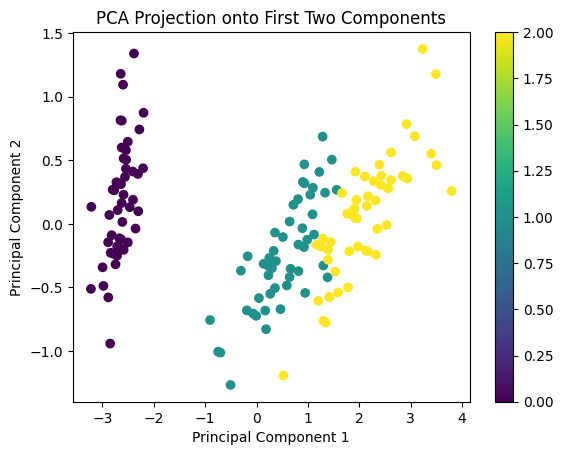

In [18]:
# Q34: Train a PCA model and visualize the data projection onto the first two principal components

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
X = data.data

# PCA model
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the data projection
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.target)
plt.title('PCA Projection onto First Two Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


In [37]:
# Q35: Train a KNN Regressor and analyze the effect of different K values on performance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Test different values of K
k_values = [1, 3, 5, 7, 9]
errors = []

for k in k_values:
    # Initialize the KNN regressor with a specific value of K
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Train the model
    knn_regressor.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn_regressor.predict(X_test)
    
    # Calculate and store the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

# Output the MSE for different K values
for k, error in zip(k_values, errors):
    print(f'Mean Squared Error for K={k}: {error}')



Mean Squared Error for K=1: 6453.348202757138
Mean Squared Error for K=3: 4936.654099195847
Mean Squared Error for K=5: 4609.2104607298825
Mean Squared Error for K=7: 4657.567436708187
Mean Squared Error for K=9: 5125.325457180483


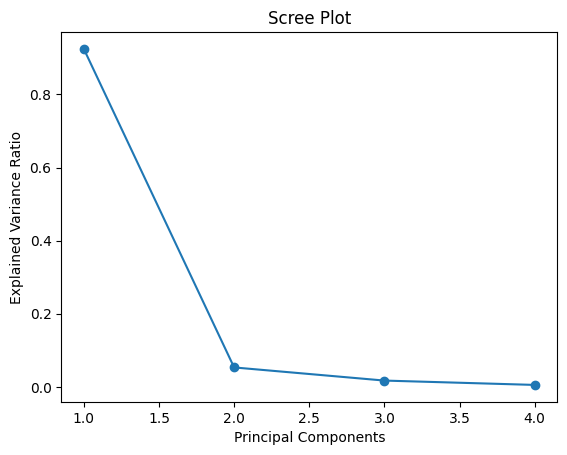

In [21]:
# Q36: Train a PCA model on a high-dimensional dataset and visualize the Scree plot

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
X = data.data

# PCA model
pca = PCA()
pca.fit(X)

# Scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


In [36]:
# Q37: Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Test different weight options
weight_options = ['uniform', 'distance']
accuracies = []

for weight in weight_options:
    knn = KNeighborsClassifier(weights=weight)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Output accuracies for different weight options
for weight, acc in zip(weight_options, accuracies):
    print(f'Accuracy with weights={weight}: {acc}')



Accuracy with weights=uniform: 1.0
Accuracy with weights=distance: 1.0


In [25]:
# Q38: Train a PCA model and analyze the effect of different numbers of components on accuracy
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Test different numbers of components
components = [1, 2, 3, 4]
accuracies = []

for n in components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Output accuracies for different numbers of components
for n, acc in zip(components, accuracies):
    print(f'Accuracy with {n} components: {acc}')



Accuracy with 1 components: 0.9777777777777777
Accuracy with 2 components: 1.0
Accuracy with 3 components: 1.0
Accuracy with 4 components: 1.0


In [26]:
# Q39: Train a KNN Classifier with different leaf_size values and compare accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Test different leaf sizes
leaf_sizes = [10, 20, 30, 40]
accuracies = []

for size in leaf_sizes:
    knn = KNeighborsClassifier(leaf_size=size)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Output accuracies for different leaf sizes
for size, acc in zip(leaf_sizes, accuracies):
    print(f'Accuracy with leaf_size={size}: {acc}')



Accuracy with leaf_size=10: 1.0
Accuracy with leaf_size=20: 1.0
Accuracy with leaf_size=30: 1.0
Accuracy with leaf_size=40: 1.0


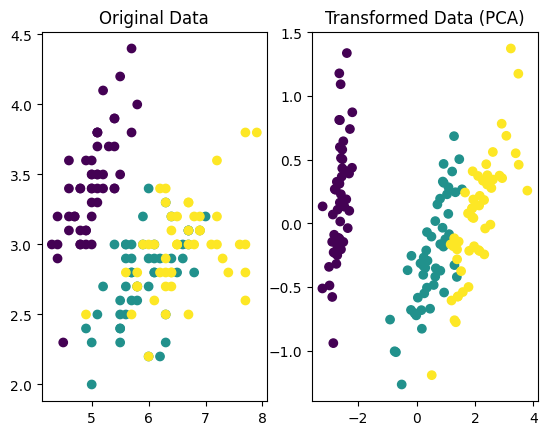

In [27]:
# Q40: Train a PCA model and visualize how data points are transformed before and after PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Train PCA model and transform data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize original vs transformed data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('Transformed Data (PCA)')

plt.show()


In [28]:
# Q41: Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



In [29]:
# Q42: Train a KNN Regressor and analyze the effect of different distance metrics on prediction error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Create synthetic regression data
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Analyze different distance metrics
metrics = ['euclidean', 'manhattan', 'chebyshev']
errors = []

for metric in metrics:
    knn_regressor = KNeighborsRegressor(metric=metric)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

# Output MSE for each distance metric
for metric, error in zip(metrics, errors):
    print(f'Mean Squared Error for {metric} distance: {error}')


Mean Squared Error for euclidean distance: 4609.2104607298825
Mean Squared Error for manhattan distance: 4626.720856980466
Mean Squared Error for chebyshev distance: 6162.908524899328


In [30]:
# Q43: Train a KNN Classifier and evaluate using ROC-AUC score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict probability for ROC-AUC score calculation
y_pred_proba = knn.predict_proba(X_test)

# Evaluate using ROC-AUC score (multi-class)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f'ROC-AUC Score: {roc_auc}')


ROC-AUC Score: 1.0


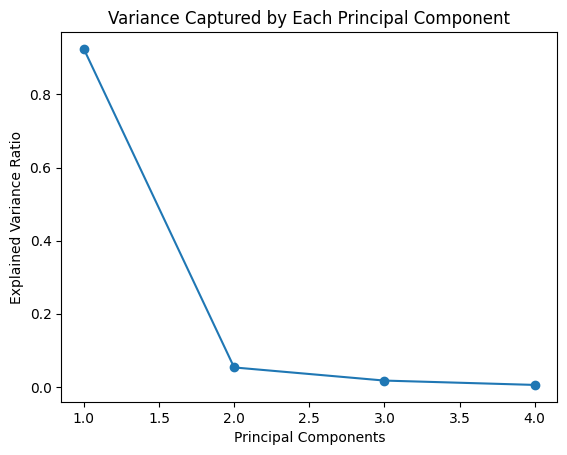

In [31]:
# Q44: Train a PCA model and visualize the variance captured by each principal component
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data

# PCA model
pca = PCA()
pca.fit(X)

# Plot explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Variance Captured by Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


In [32]:
# Q45: Train a KNN Classifier and perform feature selection before training
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Feature selection
selector = SelectKBest(f_classif, k=2)
X_selected = selector.fit_transform(X, y)

# Train KNN classifier
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with selected features: {accuracy}')


Accuracy with selected features: 1.0


In [33]:
# Q46: Train a PCA model and visualize the data reconstruction error after reducing dimensions
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data

# Train PCA model
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Reconstruct the data
X_reconstructed = pca.inverse_transform(X_pca)

# Calculate reconstruction error
reconstruction_error = np.mean((X - X_reconstructed) ** 2)
print(f'Reconstruction Error: {reconstruction_error}')


Reconstruction Error: 0.025341073932398255


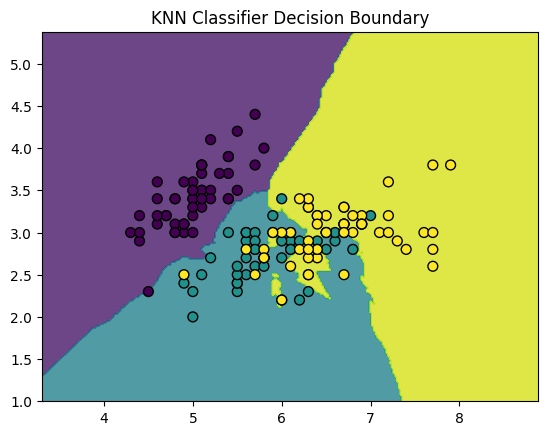

In [34]:
# Q47: Train a KNN Classifier and visualize the decision boundary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Reduce to 2D for visualization
X_reduced = X[:, :2]  # Use first two features for visualization

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Create mesh grid for decision boundary
h = .02
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.title('KNN Classifier Decision Boundary')
plt.show()


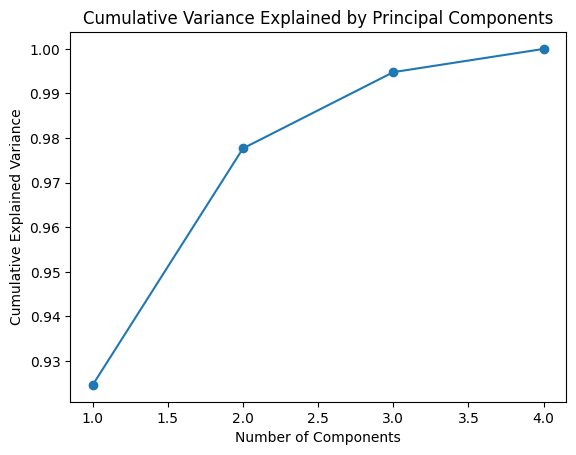

In [35]:
# Q48: Train a PCA model and analyze the effect of different numbers of components on data variance
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data

# PCA model
pca = PCA()
pca.fit(X)

# Analyze the variance explained by the components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative variance explained
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
